In [1]:
import pandas as pd

In [2]:
study_data = pd.read_csv('study-data.csv', sep = ',')

In [3]:
study_data.head(3)

,Date,Content,Platform,Begin,End,Total,Course Title,Challenges Completed,Course Complete (Y/N),Title,LINK
0,2022-06-06,Python Coding Challenge,Code Abbey,8:00,10:00,2:00,NaN,2.0,NaN,NaN,NaN
1,2022-06-06,R,Coursera,10:00,10:30,0:30,R Programming,NaN,NaN,NaN,NaN
2,2022-06-06,SQL,Datacamp,11:00,12:00,1:00,Introduction to SQL,NaN,NaN,NaN,NaN


In [4]:
study = study_data.set_index("Date")

In [5]:
study.head(3)

,Content,Platform,Begin,End,Total,Course Title,Challenges Completed,Course Complete (Y/N),Title,LINK
Date,,,,,,,,,,
2022-06-06,Python Coding Challenge,Code Abbey,8:00,10:00,2:00,NaN,2.0,NaN,NaN,NaN
2022-06-06,R,Coursera,10:00,10:30,0:30,R Programming,NaN,NaN,NaN,NaN
2022-06-06,SQL,Datacamp,11:00,12:00,1:00,Introduction to SQL,NaN,NaN,NaN,NaN


In [6]:
clean_study = study.loc["2022-06-06":"2022-06-30"]

In [19]:
for idx, val in enumerate(clean_study["Platform"]):
    if val == "Datacamp":
        clean_study["Platform"][idx] = "DataCamp"
    elif val == "DataCamp ":
        clean_study["Platform"][idx] = "DataCamp"
    elif val == "DattaCamp":
        clean_study["Platform"][idx] = "DataCamp"
    elif val == "Springboard | Kaggle":
        clean_study["Platform"][idx] = "Springboard"
    elif val == 'Leetcode | Zoom':
        clean_study["Platform"][idx] = "Leetcode"

In [8]:
from datetime import datetime

In [9]:
time_ls = []
for i in clean_study["Total"]: 
    time_ls.append(datetime.strptime(i, "%H:%M"))

In [10]:
hours = 0
minutes = 0
for i in time_ls:
    hours += i.hour
    minutes += i.minute
    
print(f"hours: {hours + minutes//60} \nmins: {minutes%60}")

hours: 133 
mins: 50


In [11]:
import matplotlib.pyplot as plt

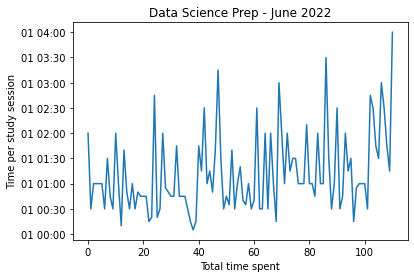

In [12]:
plt.plot(time_ls)
plt.title("Data Science Prep - June 2022")
plt.ylabel("Time per study session")
plt.xlabel("Total time spent")
plt.show()

In [13]:
import collections
import numpy as np
import matplotlib.colors as colors

In [14]:
def count_entries(df, col_name):
    '''
    Return a dctionary with counts of occurrences as value for each key.
    '''
    cols_count = {}
    

    col = df[col_name]
        
    for entry in col:
        if entry in cols_count.keys():
            cols_count[entry] += 1
        else:
            cols_count[entry] = 1
        
    return cols_count

In [15]:
platform_count = count_entries(clean_study, "Platform")

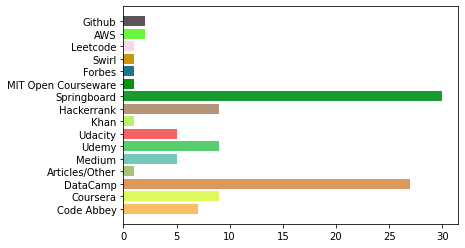

In [16]:
names = list(platform_count.keys())
values = list(platform_count.values())
l = []
for i in range(1, len(platform_count)+1):
    l.append(np.random.rand(3,))   
plt.barh(range(len(platform_count)), values, tick_label=names,  color = l)
plt.show()

In [17]:
content_count = count_entries(clean_study, "Content")

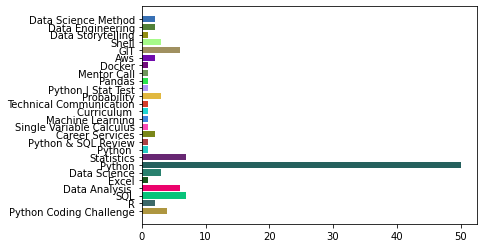

In [45]:
names = list(content_count.keys())
values = list(content_count.values())
l = []
for i in range(1, len(content_count)+1):
    l.append(np.random.rand(3,))   
plt.barh(range(len(content_count)), values, tick_label=names,  color = l)

plt.show()

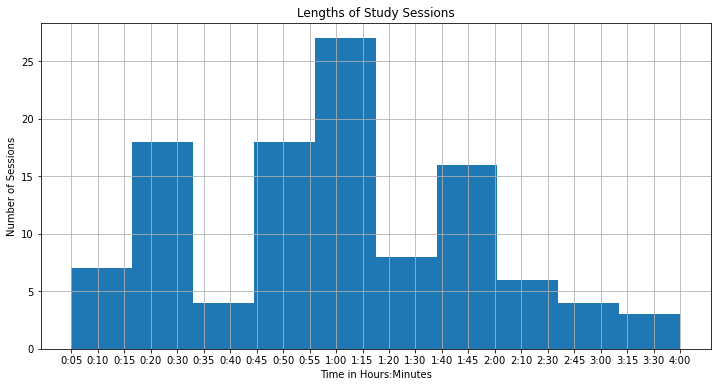

In [41]:
clean_study["Total"].sort_values().hist(figsize = (12,6))
plt.title("Lengths of Study Sessions")
plt.xlabel("Time in Hours:Minutes")
plt.ylabel("Number of Sessions")
plt.show()